In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import rasterio
import geopandas as gpd
from rasterio.mask import mask
import matplotlib.pyplot as plt
from rasterio.plot import show

4

In [39]:
data_file = 'DATA/wc2.1_2.5m_srad/wc2.1_2.5m_srad_07.tif'
dataset = rasterio.open(data_file)
dataset.crs.wkt

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [26]:
dataset.width

8640

In [27]:
dataset.height

4320

In [28]:
dataset.count

1

In [29]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'uint16'}

In [30]:
dataset.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

In [31]:
dataset.transform

Affine(0.041666666666666664, 0.0, -180.0,
       0.0, -0.041666666666666664, 90.0)

In [32]:
dataset.indexes

(1,)

In [33]:
band1 = dataset.read(1)

In [34]:
band1

array([[65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       ...,
       [34341, 34341, 34341, ..., 35743, 35699, 35656],
       [35067, 35067, 35067, ..., 36340, 36341, 36332],
       [35025, 35025, 35025, ..., 35990, 35990, 35990]], dtype=uint16)

In [35]:
import rasterio
from matplotlib import pyplot


In [40]:
src = rasterio.open(data_file)


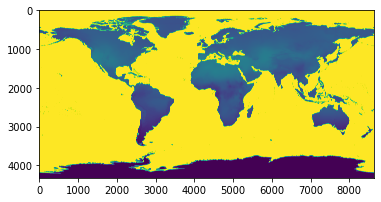

In [49]:
pyplot.imshow(src.read(1), cmap='viridis')
pyplot.show()